In [82]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

all_o3_df = pd.read_csv("./Resources/all_years_o3.csv")
#turn date column elements into datetime objects
all_o3_df["Date"] = pd.to_datetime(all_o3_df["Date"])
all_o3_df = all_o3_df.set_index("Date")

all_pm25_df = pd.read_csv("./Resources/all_years_pm25.csv")
#turn date column elements into datetime objects
all_pm25_df["Date"] = pd.to_datetime(all_pm25_df["Date"])
all_pm25_df = all_pm25_df.set_index("Date")
all_pm25_df.head()

,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2017-01-01,IN,New Delhi,pm25,24,54.9,282.7,177.7
2017-01-01,CN,Shanghai,pm25,215,12.0,63.2,34.4
2017-01-01,US,Jacksonville,pm25,115,3.1,113.6,8.1
2017-01-01,US,Los Angeles,pm25,69,3.3,109.7,15.9
2017-01-01,US,Manhattan,pm25,96,4.3,23.0,12.1


In [83]:
#select date range to measure PM2.5 for full shutdown - include all years
#messy right now - turn into a function!

#use Wuhan as an example
earliest_year = min(all_pm25_df.index.year)
latest_year = max(all_pm25_df.index.year)
shutdown_start_date = (3, 19)#"1/23"
shutdown_end_date = (4, 16)#"4/8"
mask = ((pd.Series(map(lambda x: x.month <= shutdown_start_date[0], all_pm25_df.index.date), index=all_pm25_df.index)) &
                                            ((pd.Series(map(lambda x: x.day < shutdown_start_date[1], all_pm25_df.index.date), index=all_pm25_df.index))))
#first get dates after the start date for all years
shutdown_time_period_pm_df = all_pm25_df.loc[~mask, :]

#remove the later months
shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df.index.month<=shutdown_end_date[0]]

#now get dates before the end date
mask2 = ((pd.Series(map(lambda x: x.month == shutdown_end_date[0], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index)) &
                                            ((pd.Series(map(lambda x: x.day >= shutdown_end_date[1], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index))))

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[~mask2, :]

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df["City"] == "Houston"]
print(shutdown_time_period_pm_df.head())
shutdown_time_period_pm_df.tail(10)

           Country     City Specie  count  min (ug/m3)  max (ug/m3)  \
Date                                                                  
2017-01-19      US  Houston   pm25     82          0.2         12.1   
2017-01-20      US  Houston   pm25     90          1.2         23.5   
2017-01-21      US  Houston   pm25     95          0.9         23.9   
2017-01-22      US  Houston   pm25     80          0.2          6.7   
2017-01-23      US  Houston   pm25     77          0.4         30.6   

            median (ug/m3)  
Date                        
2017-01-19             3.3  
2017-01-20             9.6  
2017-01-21            11.0  
2017-01-22             3.6  
2017-01-23             3.6  


,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2020-04-06,US,Houston,pm25,116,5.2,22.0,10.3
2020-04-07,US,Houston,pm25,120,4.8,22.0,12.5
2020-04-08,US,Houston,pm25,114,8.3,37.5,18.2
2020-04-09,US,Houston,pm25,114,0.4,33.9,14.4
2020-04-10,US,Houston,pm25,120,1.9,14.4,7.2
2020-04-11,US,Houston,pm25,120,3.1,13.0,7.9
2020-04-12,US,Houston,pm25,120,1.2,35.9,13.0
2020-04-13,US,Houston,pm25,90,1.6,12.0,5.0
2020-04-14,US,Houston,pm25,72,2.1,14.0,5.0


In [84]:
#inputs for the function are the complete dataframe for one particulate (df), the city name (city), an integer tuple in the 
#form of (month, day) for the shutdown date (shutdown_date, for example (1, 23) for 1/23) - NOTE that this is the 
#date where the strictest lockdown regulations start for that city, and an integer tuple in the 
#form of (month, day) for the reopen date (reopen_date, for example (4, 8) for 4/8) - NOTE that this is the date when the city 
#begins to reopen from the strictest lockdown regulations
#
#returns a dataframe with the correct shutdown date ranges for all years in the data set
def shutdownData(df, city, shutdown_date, reopen_date):

    mask = ((pd.Series(map(lambda x: x.month <= shutdown_date[0], df.index.date), index=df.index)) &
                                                ((pd.Series(map(lambda x: x.day < shutdown_date[1], df.index.date), index=df.index))))
    #first get dates after the start date for all years
    shutdown_time_period_df = df.loc[~mask, :]

    #remove the later months
    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df.index.month<=reopen_date[0]]

    #now get dates before the end date
    mask2 = ((pd.Series(map(lambda x: x.month == reopen_date[0], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index)) &
                                                ((pd.Series(map(lambda x: x.day >= reopen_date[1], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index))))

    shutdown_time_period_df = shutdown_time_period_df.loc[~mask2, :]

    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df["City"] == city]
    
    return shutdown_time_period_df

test_df = shutdownData(all_pm25_df, "Houston", (3, 19), (4, 16))

print("The 'shutdownData' function is working correctly:", test_df.equals(shutdown_time_period_pm_df))

The 'shutdownData' function is working correctly: True


In [85]:
#so to get the ozone information for Wuhan between the shutdown date of 1/23 and the reopening date of 4/8, we 
#need to call the function as follows:
houston_o3_shutdown_df = shutdownData(all_o3_df, "Houston", (3, 19), (4, 16))
houston_o3_shutdown_df

,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
Date,,,,,,,
2017-01-19,US,Houston,o3,89,1.0,19.0,7.0
2017-01-20,US,Houston,o3,114,1.0,36.0,17.0
2017-01-21,US,Houston,o3,111,1.0,37.0,15.0
2017-01-22,US,Houston,o3,120,8.0,37.0,30.0
2017-01-23,US,Houston,o3,106,2.0,42.0,23.0
...,...,...,...,...,...,...,...
2020-04-11,US,Houston,o3,92,15.0,43.0,33.0
2020-04-12,US,Houston,o3,95,6.0,43.0,28.0
2020-04-13,US,Houston,o3,106,6.0,32.0,23.0


In [86]:
#get average of medians by year
bar_plot_info = shutdown_time_period_pm_df.groupby(shutdown_time_period_pm_df.index.year).mean()
bar_plot_info

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,89.294118,1.864706,22.952941,7.331373
2018,113.215686,2.466667,29.545098,8.490196
2019,116.078431,1.825490,22.821569,8.182353
2020,100.705882,2.264706,19.278431,8.096078


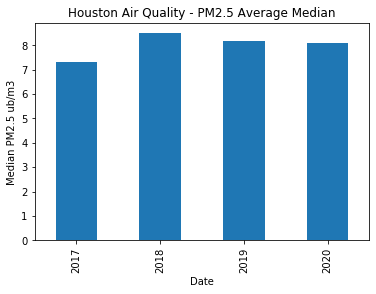

In [87]:
#plot of average medians
bar_plot_info.plot(kind="bar", y="median (ug/m3)", legend=None)
plt.ylabel("Median PM2.5 ub/m3")
plt.title("Houston Air Quality - PM2.5 Average Median")
plt.savefig("./outputs/Houston/houston_pm25median.png")

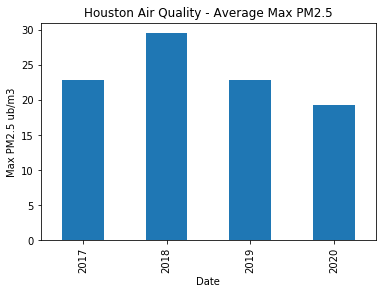

In [88]:
#plot of average maximums
bar_plot_info.plot(kind="bar", y="max (ug/m3)", legend=None)
plt.ylabel("Max PM2.5 ub/m3")
plt.title("Houston Air Quality - Average Max PM2.5")
plt.savefig("./outputs/Houston/houston_pm25max.png")

In [89]:
#get percentage decrease year over year
bar_plot_info.pct_change()

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,NaN,NaN,NaN,NaN
2018,0.267896,0.322818,0.287203,0.158064
2019,0.025286,-0.259936,-0.227568,-0.036259
2020,-0.132432,0.240602,-0.155254,-0.010544


In [90]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count             106.196078
min (ug/m3)         2.052288
max (ug/m3)        25.106536
median (ug/m3)      8.001307
dtype: float64

,average median during shutdown dates (ug/m3)
Prior Years,NaN
2020,0.011844


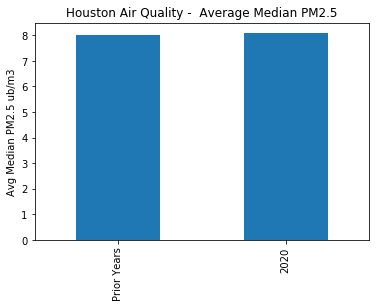

In [96]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ug/m3)":[prior_averages["median (ug/m3)"], 
                                                                                 bar_plot_info["median (ug/m3)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_bar_plot.plot(kind="bar", legend=None)
summary_bar_plot.pct_change()
plt.ylabel("Avg Median PM2.5 ub/m3")
plt.title("Houston Air Quality -  Average Median PM2.5")
plt.savefig("./outputs/Houston/houston_3yearMedianchange.png")
summary_bar_plot.pct_change()

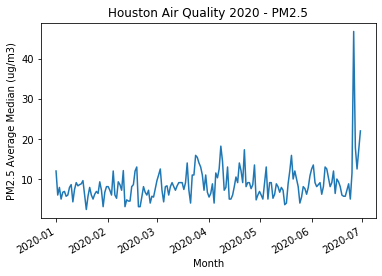

In [107]:
line_plot, line_axes = plt.subplots()
HO_2020_pm25_df = all_pm25_df.loc[(all_pm25_df.index.year == 2020) & (all_pm25_df["City"] == "Houston")]
HO_line_axes = HO_2020_pm25_df.plot(kind="line", y="median (ug/m3)", legend=None, ax=line_axes)
#set titles, axes labels
HO_line_axes.set_title("Houston Air Quality 2020 - PM2.5")
HO_line_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
HO_line_axes.set_xlabel("Month")
HO_line_axes.get_figure().savefig("./outputs/Houston/HO_2020_line_plot.png")

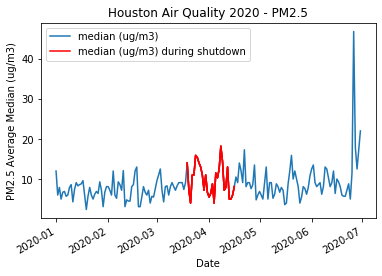

<Figure size 432x288 with 0 Axes>

In [110]:
HO_2020_shutdown = HO_2020_pm25_df["3/19/20":"4/16/20"]
shutdown_axes = HO_2020_shutdown.plot(y="median (ug/m3)", style="r", ax=line_axes)
shutdown_axes.legend(["median (ug/m3)", "median (ug/m3) during shutdown"])
plt.savefig("./outputs/Houston/houston_2020pm25_line.png")
line_plot


In [99]:
#o3
#get average of medians by year
bar_plot_info = houston_o3_shutdown_df.groupby(houston_o3_shutdown_df.index.year).mean()
bar_plot_info

,count,min (ppb),max (ppb),median (ppb)
Date,,,,
2017,111.666667,4.058824,45.843137,25.862745
2018,112.803922,5.352941,39.470588,23.098039
2019,108.666667,3.156863,43.058824,24.568627
2020,106.313725,4.431373,37.254902,20.411765


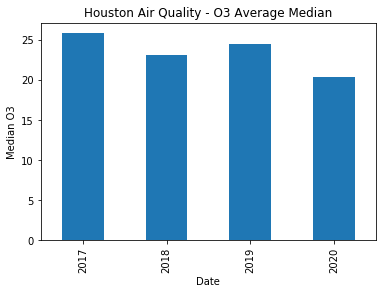

In [100]:
#plot of average medians
bar_plot_info.plot(kind="bar", y="median (ppb)", legend=None)
plt.ylabel("Median O3")
plt.title("Houston Air Quality - O3 Average Median")
plt.savefig("./outputs/Houston/houston_o3median.png")

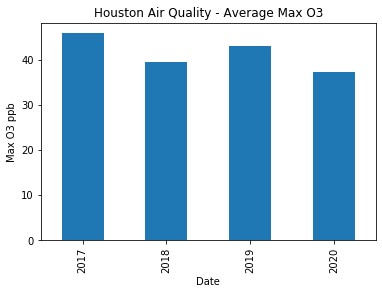

In [101]:
#plot of average maximums
bar_plot_info.plot(kind="bar", y="max (ppb)", legend=None)
plt.ylabel("Max O3 ppb")
plt.title("Houston Air Quality - Average Max O3")
plt.savefig("./outputs/Houston/houston_o3max.png")

In [102]:
#get percentage decrease year over year
bar_plot_info.pct_change()

,count,min (ppb),max (ppb),median (ppb)
Date,,,,
2017,NaN,NaN,NaN,NaN
2018,0.010184,0.318841,-0.139008,-0.106899
2019,-0.036677,-0.410256,0.090909,0.063667
2020,-0.021653,0.403727,-0.134791,-0.169194


In [103]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count           111.045752
min (ppb)         4.189542
max (ppb)        42.790850
median (ppb)     24.509804
dtype: float64

,average median during shutdown dates (ppb)
Prior Years,NaN
2020,-0.1672


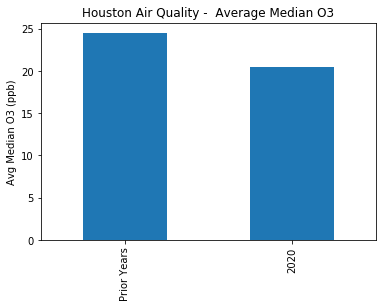

In [104]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ppb)":[prior_averages["median (ppb)"], 
                                                                                 bar_plot_info["median (ppb)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_bar_plot.plot(kind="bar", legend=None)

plt.ylabel("Avg Median O3 (ppb)")
plt.title("Houston Air Quality -  Average Median O3")
plt.savefig("./outputs/Houston/houstono3_3yearMedianchange.png")
summary_bar_plot.pct_change()